## Music Dataset - Trying ML with KNN 

In [1]:
# Helper packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
from sklearn.inspection import partial_dependence
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from category_encoders.ordinal import OrdinalEncoder


In [2]:
#import dataframe
music_df = pd.read_csv("music_dataset_cleaned.csv")
music_df

,Unnamed: 0,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.177562,0.0849,0.8990,134.071,234596.0,4,5
1,1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.177562,0.1220,0.5690,107.033,173968.0,4,5
4,4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [3]:
#quick check to ensure that we imported the correct cleaned dataset
music_df.isnull().sum()

Unnamed: 0            0
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [4]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          17996 non-null  int64  
 1   Artist Name         17996 non-null  object 
 2   Track Name          17996 non-null  object 
 3   Popularity          17996 non-null  float64
 4   danceability        17996 non-null  float64
 5   energy              17996 non-null  float64
 6   key                 17996 non-null  float64
 7   loudness            17996 non-null  float64
 8   mode                17996 non-null  int64  
 9   speechiness         17996 non-null  float64
 10  acousticness        17996 non-null  float64
 11  instrumentalness    17996 non-null  float64
 12  liveness            17996 non-null  float64
 13  valence             17996 non-null  float64
 14  tempo               17996 non-null  float64
 15  duration_in min/ms  17996 non-null  float64
 16  time

In [5]:
music_df['Class'] = music_df.Class.apply(str)
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          17996 non-null  int64  
 1   Artist Name         17996 non-null  object 
 2   Track Name          17996 non-null  object 
 3   Popularity          17996 non-null  float64
 4   danceability        17996 non-null  float64
 5   energy              17996 non-null  float64
 6   key                 17996 non-null  float64
 7   loudness            17996 non-null  float64
 8   mode                17996 non-null  int64  
 9   speechiness         17996 non-null  float64
 10  acousticness        17996 non-null  float64
 11  instrumentalness    17996 non-null  float64
 12  liveness            17996 non-null  float64
 13  valence             17996 non-null  float64
 14  tempo               17996 non-null  float64
 15  duration_in min/ms  17996 non-null  float64
 16  time

In [6]:
#replacing classes with its actuall labels 
class_map={'0':'Acoustic/Folk','1':'Alt_Music','2':'Blues','3':'Bollywood','4':'Country','5':'HipHop', '6':'IndieAlt','7':'Instrumental','8':'Metal','9':'Pop','10':'Rock'}
music_df['Class']= music_df['Class'].map(class_map)
music_df.head()

,Unnamed: 0,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.177562,0.0849,0.8990,134.071,234596.0,4,HipHop
1,1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,Rock
2,2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,IndieAlt
3,3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.177562,0.1220,0.5690,107.033,173968.0,4,HipHop
4,4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,Rock


In [7]:
music_df.drop('Unnamed: 0', inplace=True, axis=1)
music_df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.177562,0.0849,0.8990,134.071,234596.0,4,HipHop
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,Rock
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,IndieAlt
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.177562,0.1220,0.5690,107.033,173968.0,4,HipHop
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,Rock


In [8]:
music_df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
count,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039
std,17.218436,0.166268,0.235373,3.012651,4.049151,0.480949,0.083576,0.310632,0.264499,0.159212,0.240195,29.571527,1.119891e+05,0.361618
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000
25%,33.000000,0.432000,0.509000,4.000000,-9.538000,0.000000,0.034800,0.004300,0.000294,0.097500,0.297000,99.620750,1.663370e+05,4.000000
50%,44.000000,0.545000,0.700000,5.952447,-7.016000,1.000000,0.047400,0.081400,0.049850,0.129000,0.481000,120.065500,2.091600e+05,4.000000
75%,56.000000,0.659000,0.860000,8.000000,-5.189000,1.000000,0.083000,0.434000,0.177562,0.258000,0.672000,141.969250,2.524900e+05,4.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000


In [9]:
music_df.duplicated().sum()

0

### Testing different features with the classes

In [10]:
sns.set(font_scale=1.2)
plt.style.use('ggplot')

from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 18, 14

In [11]:
#sns.scatterplot(music_df['Class'], music_df['loudness'], hue=music_df['Class']);

In [12]:
#sns.scatterplot(music_df['Class'], music_df['tempo'], hue=music_df['Class']);

In [13]:
#sns.scatterplot(music_df['Class'], music_df['duration_in min/ms'], hue=music_df['Class']);

In [14]:
#sns.scatterplot(music_df['Class'], music_df['Popularity'], hue=music_df['Class']);

### Trying knn with only a few features

In [15]:
#trying to use features
X = music_df.loc[:, ['acousticness','instrumentalness', 'danceability', 'speechiness']]
y = music_df.iloc[:, -1]
print(X.shape)
print(y.shape)
X

(17996, 4)
(17996,)


,acousticness,instrumentalness,danceability,speechiness
0,0.017100,0.177562,0.854,0.0485
1,0.001100,0.004010,0.382,0.0406
2,0.486000,0.000196,0.434,0.0525
3,0.021200,0.177562,0.853,0.0555
4,0.000169,0.016100,0.167,0.2160
...,...,...,...,...
17991,0.993000,0.824000,0.166,0.0413
17992,0.858000,0.000016,0.638,0.0329
17993,0.000030,0.000136,0.558,0.0712
17994,0.001290,0.916000,0.215,0.1340


In [16]:
#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 123, stratify=y)

In [17]:
#scailing 
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)
# create KNN model object
knn = KNeighborsClassifier(n_neighbors=5)


# create 5 fold CV object
kfold = KFold(n_splits=5, random_state=123, shuffle=True)

# fit model with 5-fold CV
results = cross_val_score(knn, X_train, y_train, cv=kfold)


np.round(results, 3)

array([0.326, 0.339, 0.344, 0.341, 0.327])

In [18]:
#tunning 
knn = KNeighborsClassifier()

# Create grid of hyperparameter values
hyper_grid = {'n_neighbors': range(1, 101, 4)}

# Tune a knn model using grid search
grid_search = GridSearchCV(knn, hyper_grid, cv=kfold)
results = grid_search.fit(X_train, y_train)

# Best model's cross validated RMSE
abs(results.best_score_)

0.41104976779649266

In [19]:
# Best model's k value
optimal_k = results.best_estimator_.get_params().get('n_neighbors')
optimal_k

85

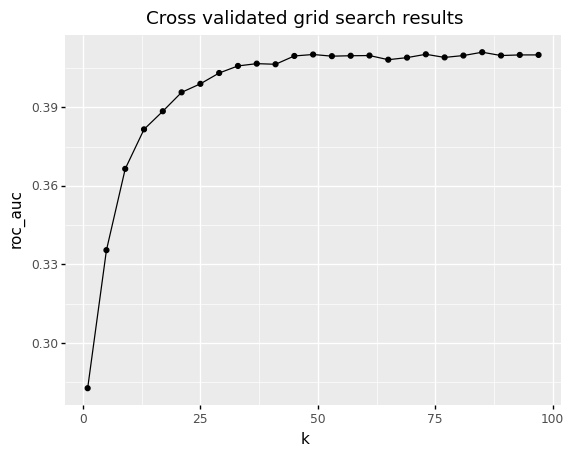

<ggplot: (8780096448531)>

In [20]:
# Plot all RMSE results
all_errors = pd.DataFrame({
  'k': range(1, 101, 4),
  'roc_auc': results.cv_results_['mean_test_score']
  })

(ggplot(all_errors, aes(x='k', y='roc_auc'))
 + geom_line()
 + geom_point()
 + ggtitle("Cross validated grid search results"))

In [21]:
# best model
knn_best = KNeighborsClassifier(n_neighbors=optimal_k)
knn_best_fit = knn_best.fit(X_train, y_train)

In [22]:
y_pred = knn_best_fit.predict(X_test)

In [23]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print(ac)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cmn)

#disp.plot(cmap=plt.cm.BuPu)
#plt.show()

0.4152620855714021


less than 40% accuracy, we should try other approach

### Using all numerical features

In [24]:
#by taking all numerical features for x
X = music_df.select_dtypes(exclude ='object')
y = music_df.iloc[:, -1]
print(X.shape)
print(y.shape)

(17996, 14)
(17996,)


In [25]:
X

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.177562,0.0849,0.8990,134.071,234596.0,4
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4
3,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.177562,0.1220,0.5690,107.033,173968.0,4
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3
17992,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4
17993,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4
17994,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4


In [26]:
#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 123, stratify=y)

In [27]:
#scailing 
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# create KNN model object
knn = KNeighborsClassifier(n_neighbors=5)


# create 5 fold CV object
kfold = KFold(n_splits=5, random_state=123, shuffle=True)

# fit model with 5-fold CV
results = cross_val_score(knn, X_train, y_train, cv=kfold)


np.round(results, 3)

array([0.425, 0.419, 0.431, 0.422, 0.429])

In [28]:
#tunning 
knn = KNeighborsClassifier()

# Create grid of hyperparameter values
hyper_grid = {'n_neighbors': range(1, 101, 4)}

# Tune a knn model using grid search
grid_search = GridSearchCV(knn, hyper_grid, cv=kfold)
results = grid_search.fit(X_train, y_train)

# Best model's cross validated RMSE
abs(results.best_score_)

0.4901162907931467

In [29]:
# Best model's k value
optimal_k = results.best_estimator_.get_params().get('n_neighbors')
optimal_k

33

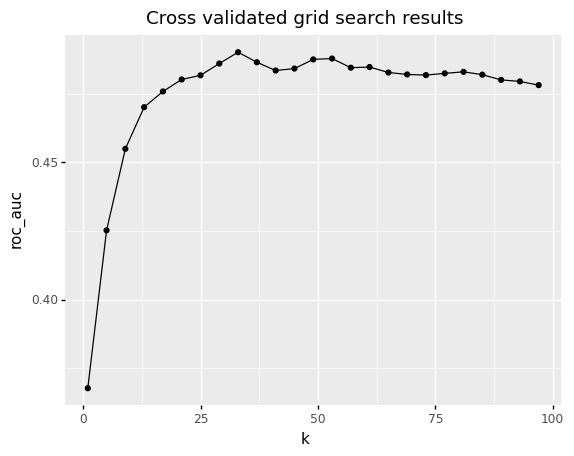

<ggplot: (8780096505811)>

In [30]:
# Plot all RMSE results
all_errors = pd.DataFrame({
  'k': range(1, 101, 4),
  'roc_auc': results.cv_results_['mean_test_score']
  })

(ggplot(all_errors, aes(x='k', y='roc_auc'))
 + geom_line()
 + geom_point()
 + ggtitle("Cross validated grid search results"))

In [31]:
# best model
knn_best = KNeighborsClassifier(n_neighbors=optimal_k)
knn_best_fit = knn_best.fit(X_train, y_train)

In [32]:
y_pred = knn_best_fit.predict(X_test)

In [33]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print(ac)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cmn)

#disp.plot(cmap=plt.cm.BuPu)
#plt.show()

0.4930542693091313


Better accuracy but it still not enough

### Trying all numerical features with encoded artist name

In [34]:
#removing the track name since we will use all features except it
del music_df['Track Name']


In [35]:
#start encoding artist name
le = preprocessing.LabelEncoder()
le.fit(music_df['Artist Name'])

LabelEncoder()

In [36]:
music_df['Artist Name']=le.transform(music_df['Artist Name'])
music_df

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1182,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.177562,0.0849,0.8990,134.071,234596.0,4,HipHop
1,1092,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,Rock
2,7899,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,IndieAlt
3,1987,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.177562,0.1220,0.5690,107.033,173968.0,4,HipHop
4,6283,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,3042,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,IndieAlt
17992,5122,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,Blues
17993,7032,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,Metal
17994,797,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,Metal


In [37]:
X = music_df.iloc[:, :-1]
y = music_df.iloc[:, -1]
print(X.shape)
print(y.shape)

(17996, 15)
(17996,)


In [38]:
#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 123, stratify=y)

In [39]:
#scailing 
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# create KNN model object
knn = KNeighborsClassifier(n_neighbors=5)

# create 5 fold CV object
kfold = KFold(n_splits=5, random_state=123, shuffle=True)

# fit model with 5-fold CV
results = cross_val_score(knn, X_train, y_train, cv=kfold)


np.round(results, 3)

array([0.409, 0.421, 0.425, 0.425, 0.43 ])

In [40]:
#tunning 
knn = KNeighborsClassifier()

# Create grid of hyperparameter values
hyper_grid = {'n_neighbors': range(1, 101, 4)}

# Tune a knn model using grid search
grid_search = GridSearchCV(knn, hyper_grid, cv=kfold)
results = grid_search.fit(X_train, y_train)

# Best model's cross validated RMSE
abs(results.best_score_)

0.48257556853626726

In [41]:
# Best model's k value
optimal_k = results.best_estimator_.get_params().get('n_neighbors')
optimal_k

49

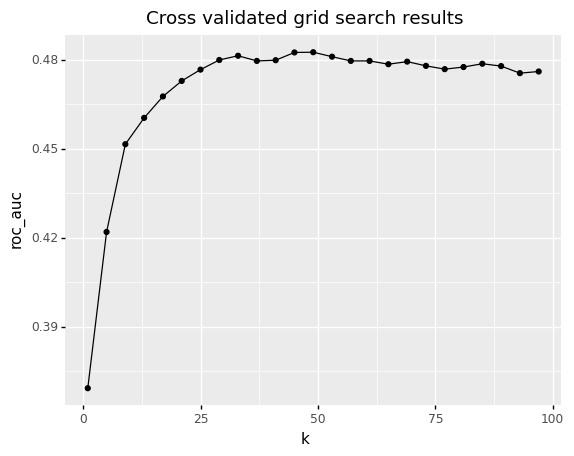

<ggplot: (8780096340628)>

In [42]:
# Plot all RMSE results
all_errors = pd.DataFrame({
  'k': range(1, 101, 4),
  'roc_auc': results.cv_results_['mean_test_score']
  })

(ggplot(all_errors, aes(x='k', y='roc_auc'))
 + geom_line()
 + geom_point()
 + ggtitle("Cross validated grid search results"))

In [43]:
# best model
knn_best = KNeighborsClassifier(n_neighbors=optimal_k)
knn_best_fit = knn_best.fit(X_train, y_train)

In [44]:
y_pred = knn_best_fit.predict(X_test)

In [45]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print(ac)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cmn)

#disp.plot(cmap=plt.cm.BuPu)
#plt.show()

0.49268383033895163
